In [81]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
root_dir = "/Users/y1u0d2/desktop/Lab/result/nnp-train/20211130"
save_dir = '/Users/y1u0d2/desktop/Lab/result/nnp-train/20211130/pic/rmse'

In [82]:
beta_11 = '/Users/y1u0d2/desktop/Lab/result/nnp-train/20211130/beta_11'
beta_100 = '/Users/y1u0d2/desktop/Lab/result/nnp-train/20211130/beta_100'
beta_1000 = '/Users/y1u0d2/desktop/Lab/result/nnp-train/20211130/beta_1000'

In [83]:
df_all_11 = pd.read_excel(f'{beta_11}/score.xlsx', sheet_name=None)
df_all_100 = pd.read_excel(f'{beta_100}/score.xlsx', sheet_name=None)
df_all_1000 = pd.read_excel(f'{beta_1000}/score.xlsx', sheet_name=None)
# df_all_1000 = pd.read_excel(f'{directory}/score.xlsx', sheet_name=None)

In [84]:
# diff of sheet
keys = df_all_11.keys()
diff = len(set(df_all_11.keys()) - set(df_all_100.keys()))
if not diff == 0:
    raise Exception('inconsistent')

<ipython-input-85-7b4b0d0bb47a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1,3,figsize=(18,4))


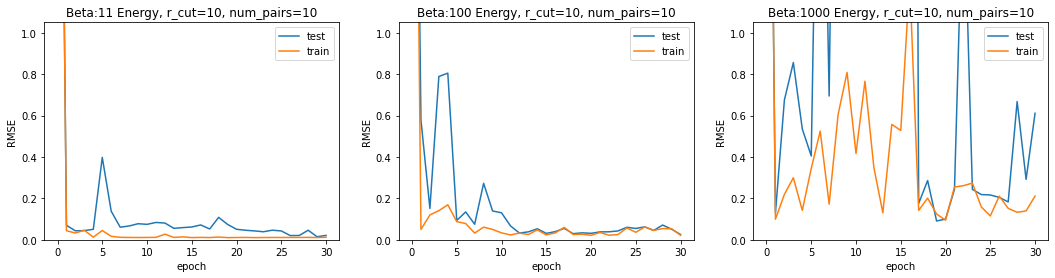

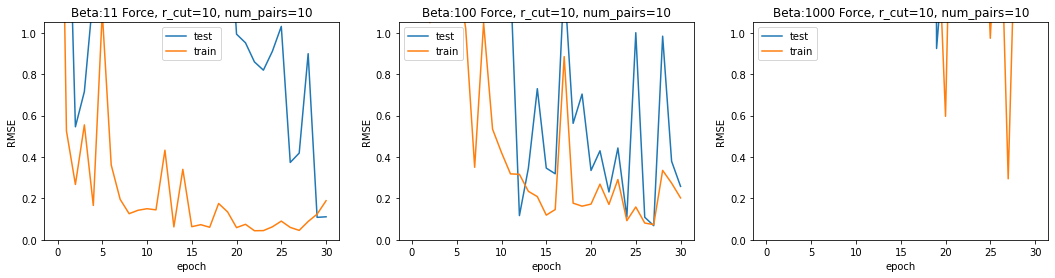

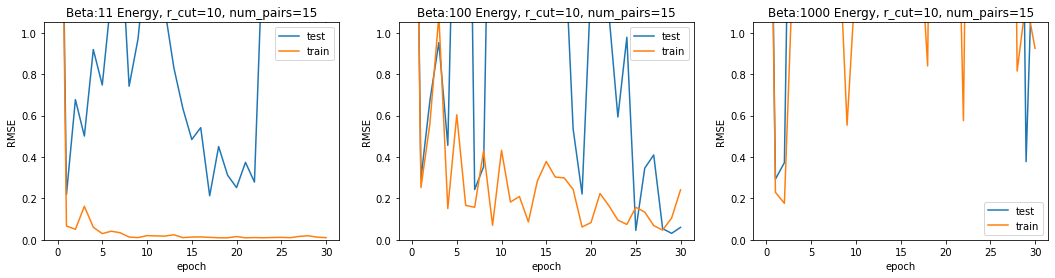

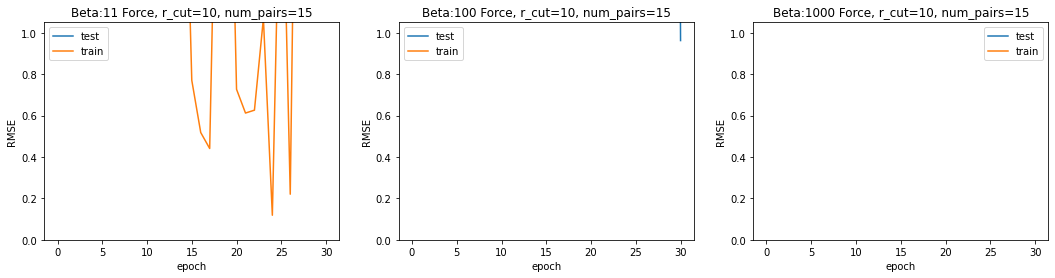

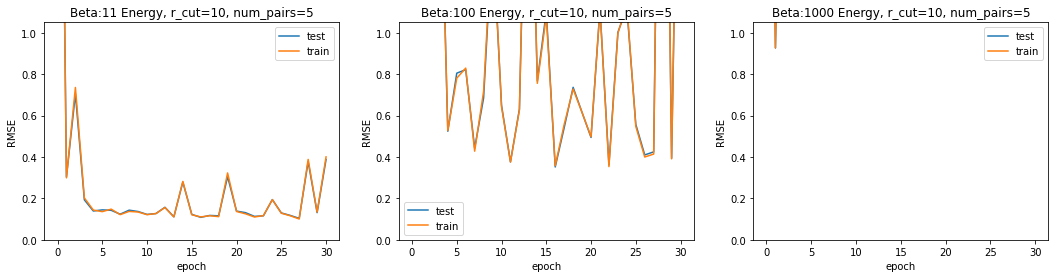

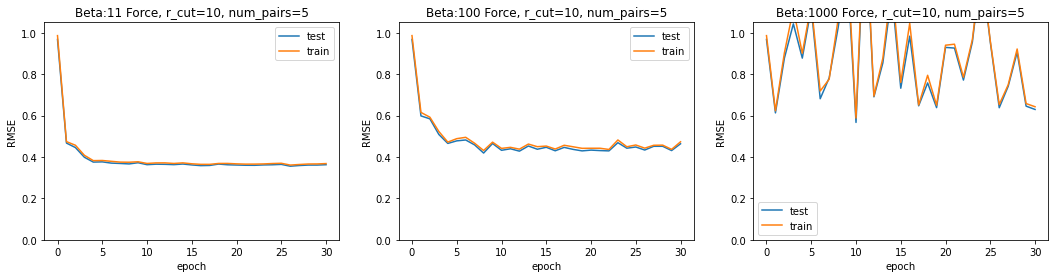

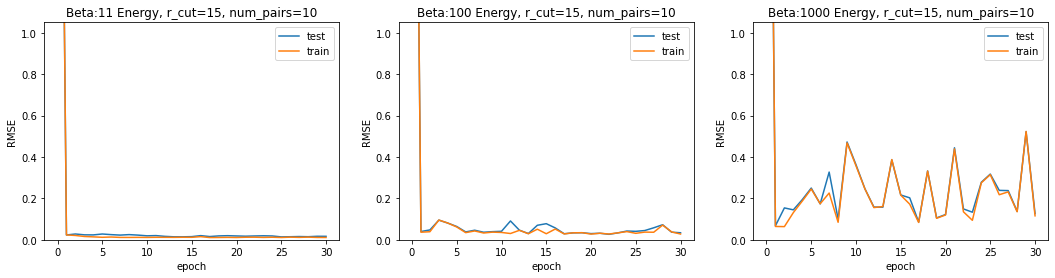

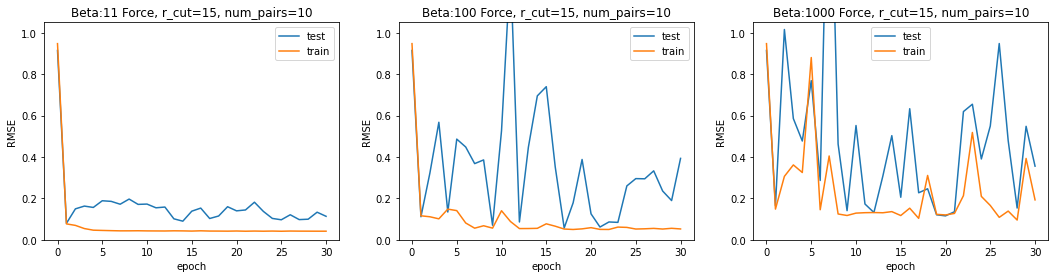

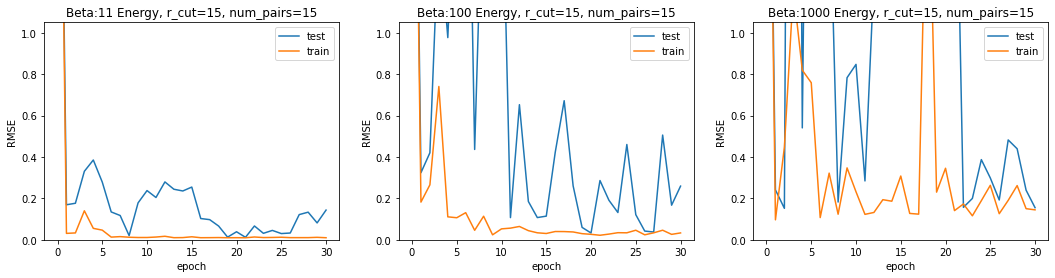

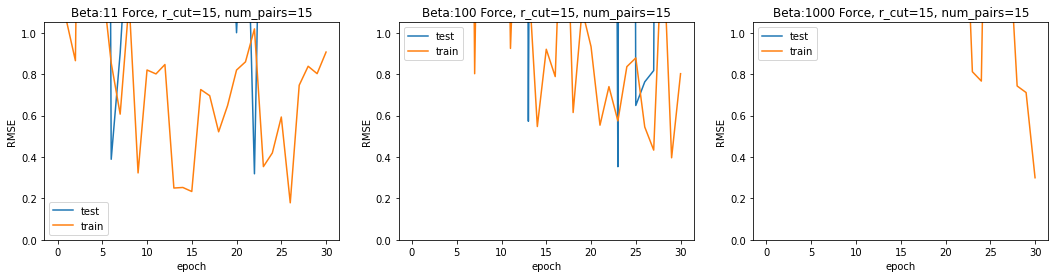

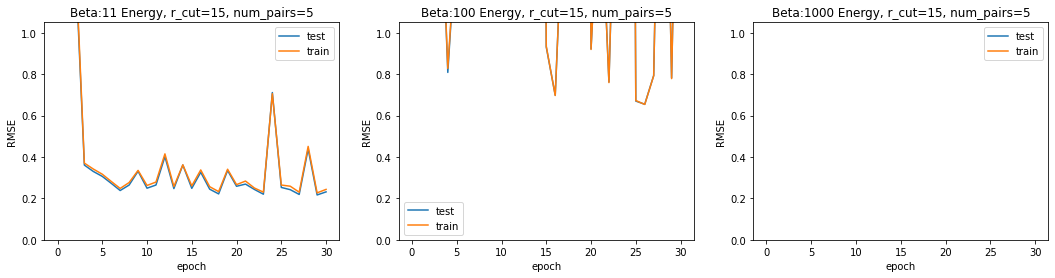

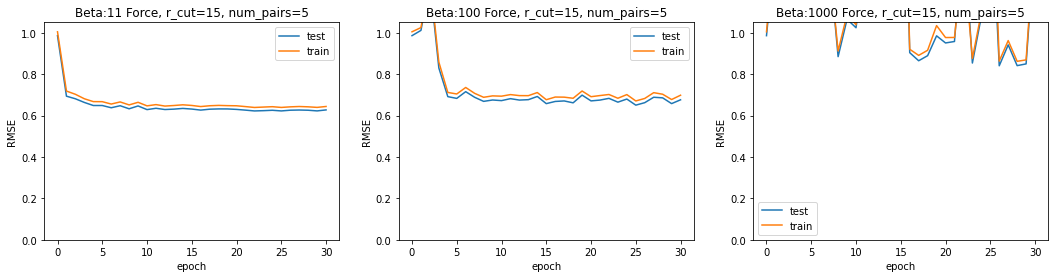

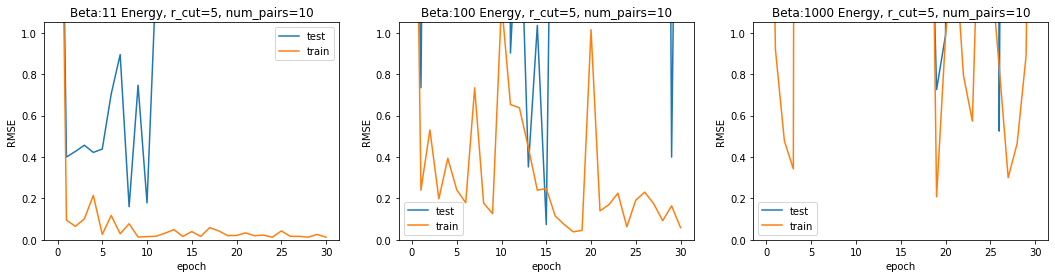

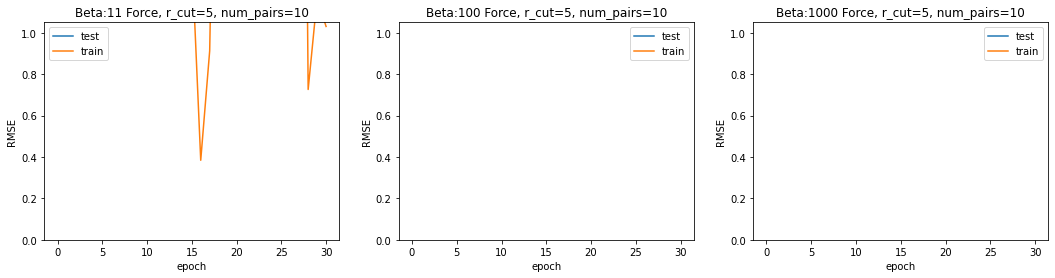

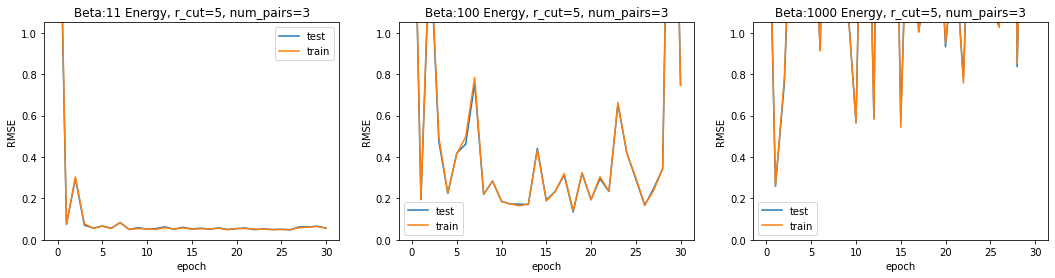

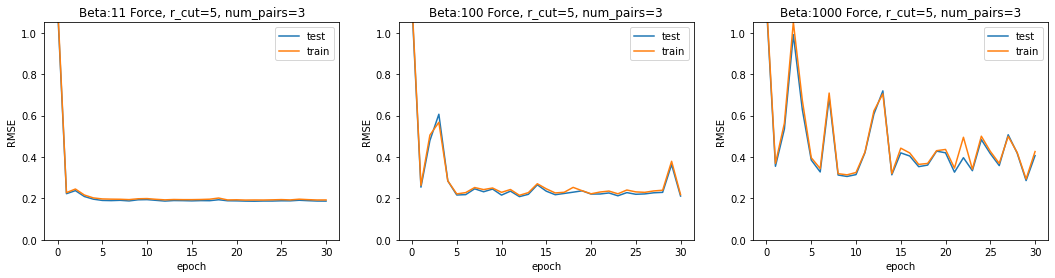

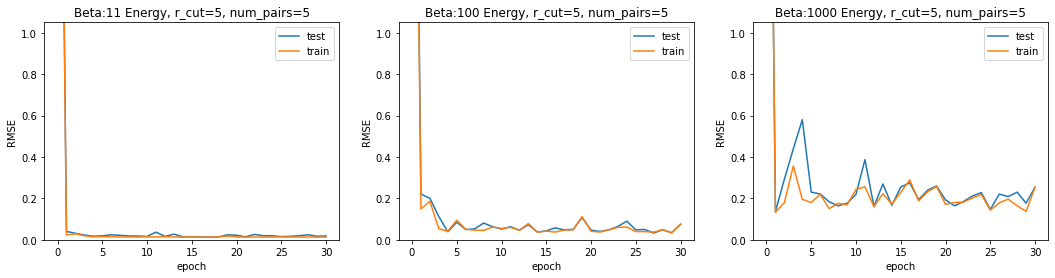

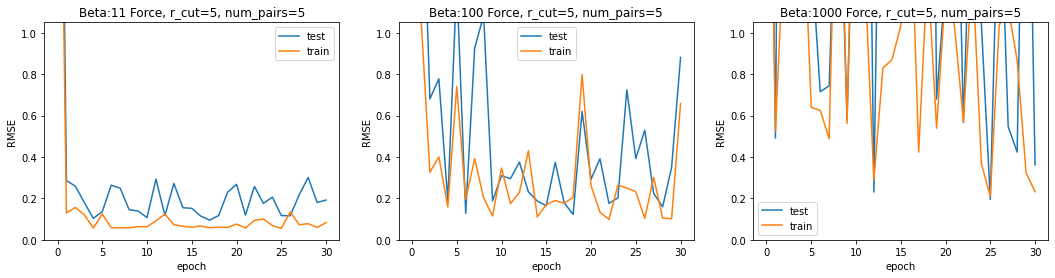

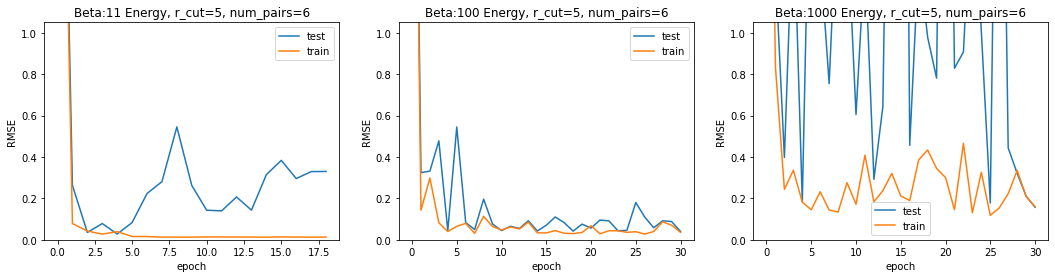

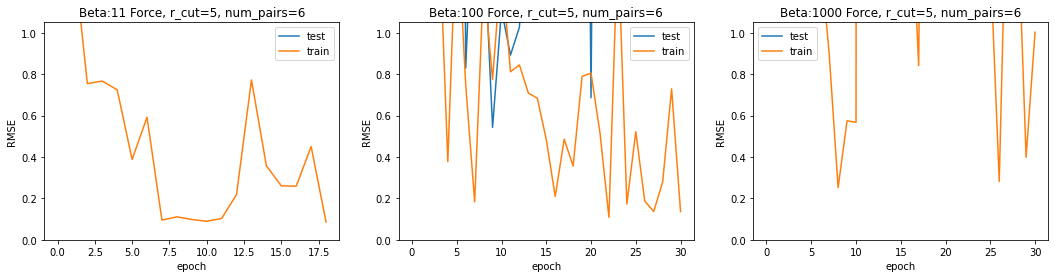

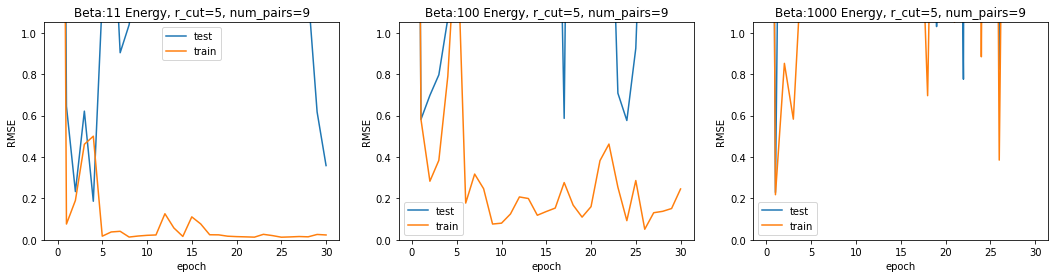

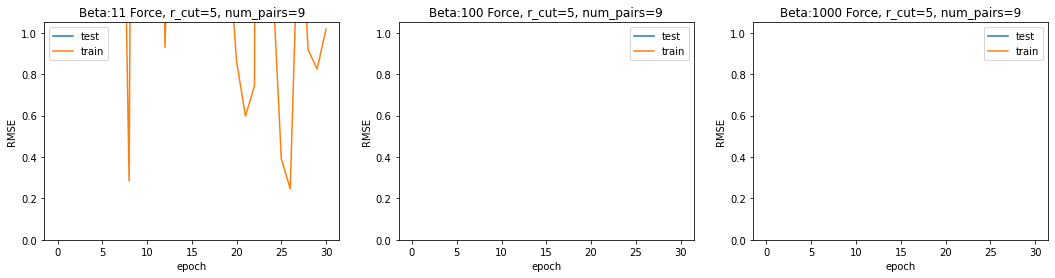

In [85]:
for i, key in enumerate(keys):
    # if i > 0:
    #     break
    fig, axes = plt.subplots(1,3,figsize=(18,4))

    ymin = 0
    ymax = 1.05

    df_11 = df_all_11[key].copy()
    df_100 = df_all_100[key].copy()
    df_1000 = df_all_1000[key].copy()

    df_test_11 = df_11[df_11.type == 'test']
    df_train_11 = df_11[df_11.type == 'train']
    axes[0].set_title(f'Beta:11 {key}')
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('RMSE')
    axes[0].set_ylim(ymin,ymax)
    axes[0].plot(df_test_11.epoch, df_test_11.RMSE, label='test')
    axes[0].plot(df_train_11.epoch, df_train_11.RMSE, label='train')
    axes[0].legend()

    df_test_100 = df_100[df_100.type == 'test']
    df_train_100 = df_100[df_100.type == 'train']
    axes[1].set_title(f'Beta:100 {key}')
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel('RMSE')
    axes[1].set_ylim(ymin,ymax)
    axes[1].plot(df_test_100.epoch, df_test_100.RMSE, label='test')
    axes[1].plot(df_train_100.epoch, df_train_100.RMSE, label='train')
    axes[1].legend()

    df_test_1000 = df_1000[df_1000.type == 'test']
    df_train_1000 = df_1000[df_1000.type == 'train']
    axes[2].set_title(f'Beta:1000 {key}')
    axes[2].set_xlabel('epoch')
    axes[2].set_ylabel('RMSE')
    axes[2].set_ylim(ymin,ymax)
    axes[2].plot(df_test_1000.epoch, df_test_1000.RMSE, label='test')
    axes[2].plot(df_train_1000.epoch, df_train_1000.RMSE, label='train')
    axes[2].legend()

    if 'Energy' in key:
        if not os.path.exists(f'{save_dir}/energy'):
            os.mkdir(f'{save_dir}/energy')
        fig.savefig(f'{save_dir}/energy/{key}.png')
    elif 'Force' in key:
        if not os.path.exists(f'{save_dir}/force'):
            os.mkdir(f'{save_dir}/force')
        fig.savefig(f'{save_dir}/force/{key}.png')
